# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df = df.drop(['Id'], axis='columns')

You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# your code here
columns = [column for column in df.isnull().sum().index]
nulls = [(nulls / len(df)) * 100  for nulls in df.isnull().sum()]
percent_nulls = pd.DataFrame([columns, nulls]).T.rename({0:'column_name', 1:'percent_missing'}, axis = 1)

In [5]:
percent_nulls[percent_nulls['percent_missing'] > 20] # returns values were more than 20% missing

,column_name,percent_missing
5,Alley,93.7671
56,FireplaceQu,47.2603
71,PoolQC,99.5205
72,Fence,80.7534
73,MiscFeature,96.3014


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [6]:
# your code here
df = df.drop(percent_nulls[percent_nulls['percent_missing'] > 20]['column_name'].values, axis = 'columns')

In [7]:
df.shape

(1460, 75)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

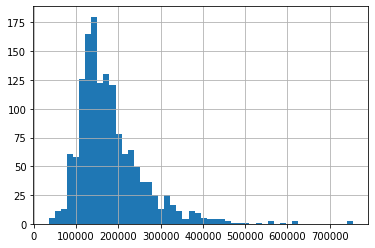

In [8]:
# your code here
%matplotlib inline
df.SalePrice.hist(bins=50)

In [32]:
# shape summary
print('Mean: ', df.SalePrice.mean(),'\nVariance: ', np.var(df.SalePrice.values),
      '\nSkew: ', df.SalePrice.skew(),'\nKurtosis:',  df.SalePrice.kurt())

Mean:  180921.19589041095 
Variance:  6306788585.349299 
Skew:  1.8828757597682129 
Kurtosis: 6.536281860064529


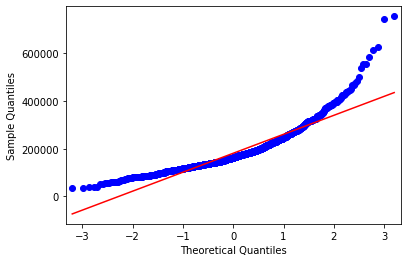

In [10]:
# your comment here
from statsmodels.graphics.gofplots import qqplot

qqplot(df.SalePrice, line='s')
plt.show()

# Following a visual examination of the shape and keeping in mind that this is a rough approximation
# the data appears to be skewed.

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

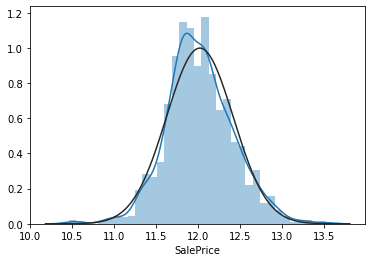

<Figure size 432x288 with 0 Axes>

In [61]:
# your code here
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.distplot(np.log(df['SalePrice']), fit=norm)
fig = plt.figure()

In [12]:
df['SalePriceAdjusted'] = df['SalePrice'].apply(np.log)

In [13]:
df.head()
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [85]:
# your code here
# add cells as needed
df['TotalBathAbvGr'] = df['FullBath'] + (df['HalfBath'] / 2)
df['TotalBsmtBath'] = df['BsmtFullBath'] +  (df['BsmtHalfBath'] / 2)
df['TotalBath'] = df['TotalBathAbvGr'] + df['TotalBsmtBath']

# Br/Ba per house

df['BrBa'] = round(df['BedroomAbvGr'] / df['TotalBath'], 2)

In [86]:
df['Age'] = 2019 - (df['YearRemodAdd'])
df['TotalAge'] = 2019 - (df['YearBuilt'])

# Size of the house
size = ['GrLivArea', 'LotArea', 'GarageArea']
# Number of rooms
rooms = ['BrBa', 'BedroomAbvGr', 'TotalBath', 'TotalBsmtBath', 'TotalBathAbvGr', 'KitchenAbvGr']
# Age of home
age = ['TotalAge', 'Age']

In [87]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
correlations = pd.DataFrame(corr['SalePrice'].sort_values(ascending = False)[1:]).T

# Numerical

In [88]:
# Size
correlations[size].T.sort_values(by = 'SalePrice', ascending=False)

,SalePrice
GrLivArea,0.708624
GarageArea,0.623431
LotArea,0.263843


In [89]:
df['TotalAge'].describe()

count    1460.000000
mean       47.732192
std        30.202904
min         9.000000
25%        19.000000
50%        46.000000
75%        65.000000
max       147.000000
Name: TotalAge, dtype: float64

In [90]:
# Age Groups
def ageGroup(age):
    if age <= 20:
        return '20 or less'
    elif age <=50:
        return 'between 20 and 50'
    elif age <=70:
        return 'between 50 and 70 '
    else:
        return '70 or more'

df['AgeGroup'] = df['TotalAge'].apply(lambda x: ageGroup(x))
df['RemAgeGroup'] = df['Age'].apply(lambda x: ageGroup(x))

In [91]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,SalePriceAdjusted,TotalBathAbvGr,TotalBsmtBath,TotalBath,BrBa,Age,TotalAge,AgeGroup,RemAgeGroup
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,208500,12.247694,2.5,1.0,3.5,0.86,16,16,20 or less,20 or less
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,181500,12.109011,2.0,0.5,2.5,1.20,43,43,between 20 and 50,between 20 and 50
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,223500,12.317167,2.5,1.0,3.5,0.86,17,18,20 or less,20 or less
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,140000,11.849398,1.0,1.0,2.0,1.50,49,104,70 or more,between 20 and 50
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,250000,12.429216,2.5,1.0,3.5,1.14,19,19,20 or less,20 or less


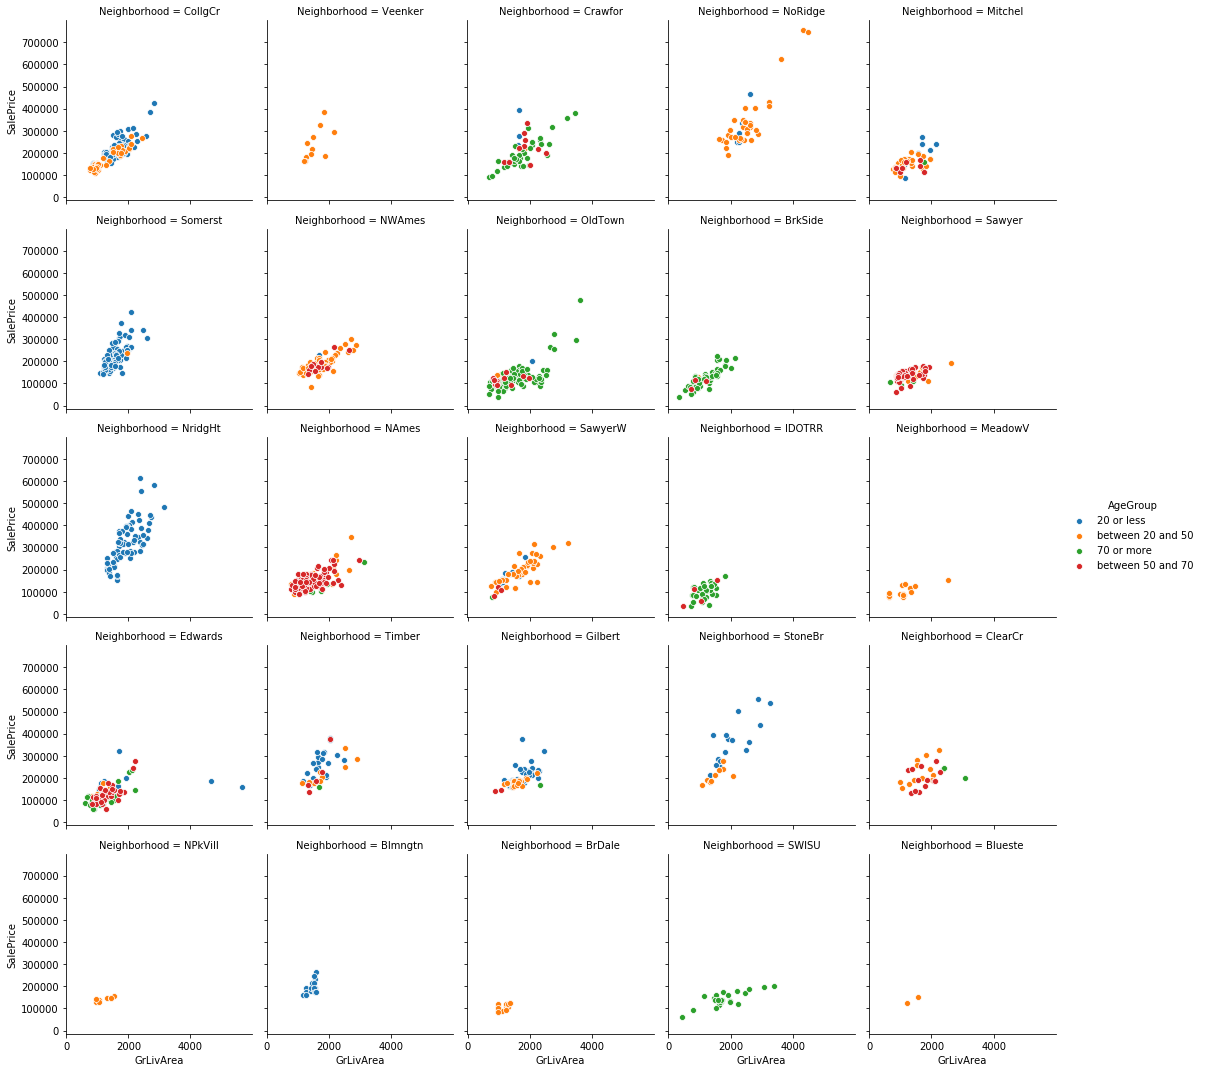

In [92]:
# Generate a series of scatter plots, showing the relationship between GrLivArea, and SalePrice
# Additional variables are also visualized [Neighborhood and Age group]
# we can simultaneously postulate whether or not the age of a home plays a significant 
# role in determining housing costs through visual inspection
g = sns.FacetGrid(df, col = 'Neighborhood', hue = 'AgeGroup', col_wrap= 5)
g.map(sns.scatterplot, 'GrLivArea', 'SalePrice')
g.add_legend()

# switching out AgeGroup for RemAgeGroup can allow us to visualize the extent to which remodelling affects sale price

Text(0.5, 1.0, 'Above ground living area versus Sales Price')

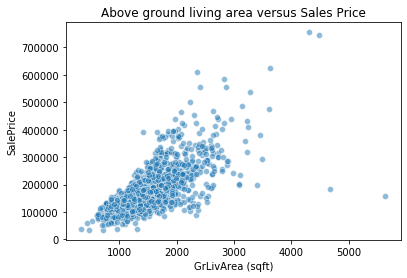

In [93]:
# Honing in on the relationship between the dependent variable SalesPrice and GrLivArea
# excluding other variables from the visualization

sns.scatterplot('GrLivArea', 'SalePrice', data=df, alpha=.5)
plt.xlabel('GrLivArea (sqft)')
plt.title("Above ground living area versus Sales Price")

# Categorical

In [94]:
# Number of rooms
correlations[rooms].T.sort_values(by = 'SalePrice', ascending=False)

,SalePrice
TotalBath,0.631731
TotalBathAbvGr,0.597966
TotalBsmtBath,0.224953
BedroomAbvGr,0.168213
KitchenAbvGr,-0.135907
BrBa,-0.409388


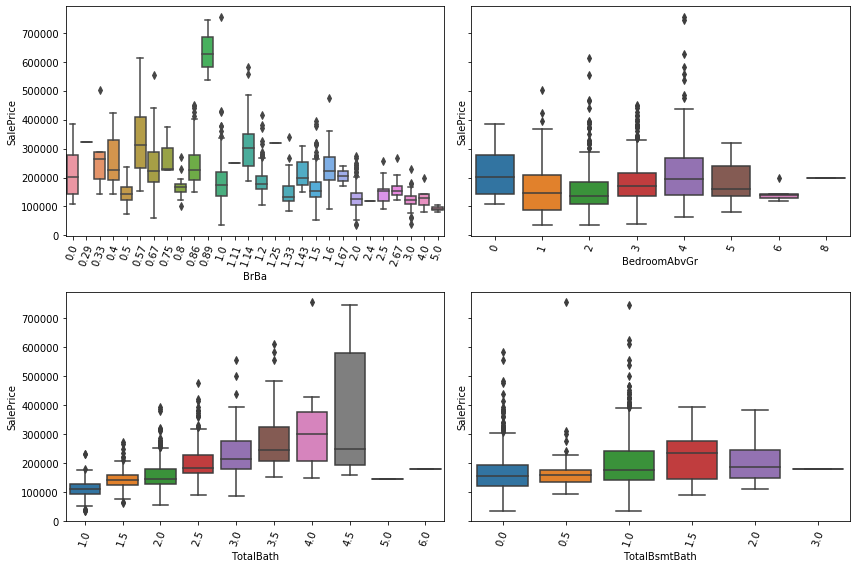

In [95]:
# number of rooms
fig, axes =plt.subplots(2,2, figsize=(12,8), sharey=True)
axes = axes.flatten()

for ax, val in zip(axes, rooms):
    sns.boxplot(y='SalePrice', x=val,  data=df, ax=ax)
    ax.tick_params(axis = 'x', rotation=70)

plt.tight_layout()  
plt.show()
# the box plot for Total Bath suggests there exists a positive correlation with sale price.

In [26]:
# Age
correlations[age].T.sort_values(by = 'SalePrice', ascending=False)

,SalePrice
Age,-0.507101
TotalAge,-0.522897


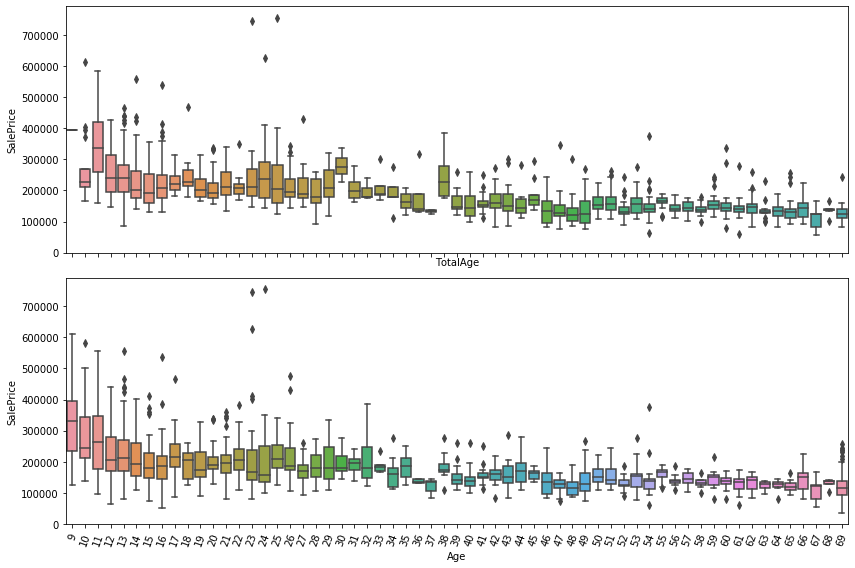

In [99]:
# Age of home
fig, axes =plt.subplots(2, 1, figsize=(12,8), sharex=True)
axes = axes.flatten()

for ax, val in zip(axes, age):
    sns.boxplot(y='SalePrice', x=val,  data=df, ax=ax)
    ax.tick_params(axis = 'x', rotation=70)

plt.tight_layout()  
plt.show()
# Total age represents current year minus year built whereas age is current year minus year remodeled.
# a decrease in each variable may be aligned with an increase in Sale price.

In [101]:
df['TotalAge'].describe()

count    1460.000000
mean       47.732192
std        30.202904
min         9.000000
25%        19.000000
50%        46.000000
75%        65.000000
max       147.000000
Name: TotalAge, dtype: float64

Text(0.5, 0, 'Neighborhood')

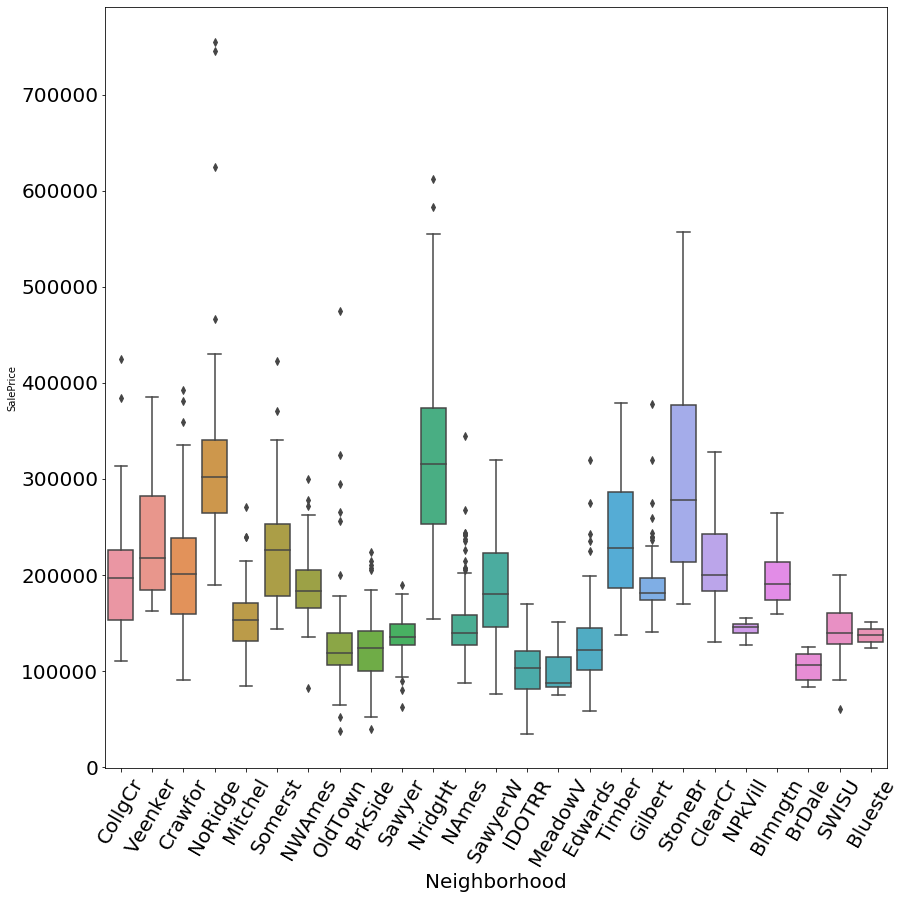

In [106]:
plt.figure(figsize=(14, 14))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df)
plt.yticks(fontsize = 20)
plt.xticks(rotation=60, fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 20)

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

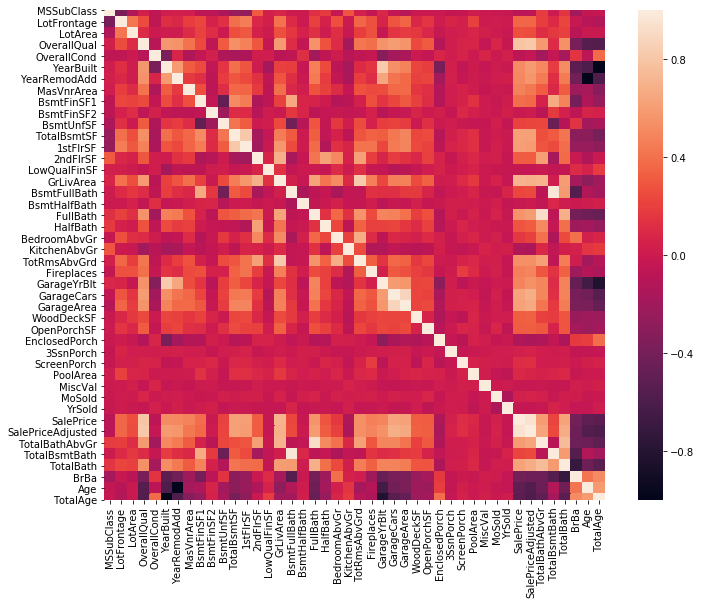

In [111]:
# your code here
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), square=True)

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [116]:
# your comment here
cols = df.corr().nlargest(10, 'SalePrice')['SalePrice'][2:].index
print(*cols.values, sep='\n')

# The output below represents columns with highest correlation with sale price
# certain columns such as OverallQual, which is likely a function of other variables, may have 
# a high correlation value as a result of collinearity. Another example of this would be 
# TotalBath and TotalBathAbvGr

OverallQual
GrLivArea
GarageCars
TotalBath
GarageArea
TotalBsmtSF
1stFlrSF
TotalBathAbvGr


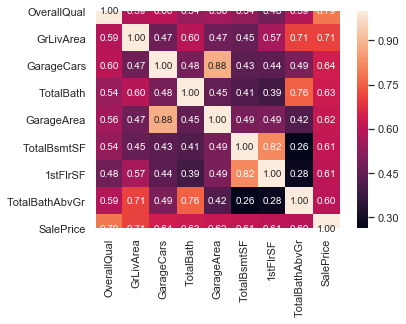

In [129]:
temp = df[cols].join(df['SalePrice'])
cm = np.corrcoef(temp.values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True,
                 square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=temp.columns.values, xticklabels=temp.columns.values)
plt.show()

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [ ]:
# your responses here
# add cells as needed

### Strong Correlations with 'SalePrice'
* 'GrLivArea'<br><br>
Other variables describing space ('TotalBsmtSF','1stFlrSF' etc...) show collinearity with 'GrLivArea' and one another. 'GrLivArea' accounts for most if not the entire home area based on the description provided in the metadata.<br>
'OverallQual' is removed from consideration given that it is likely derived or calculated from other variables that are influencing Sale Price.

Text(0.5, 1.0, 'Above ground living area versus Sales Price')

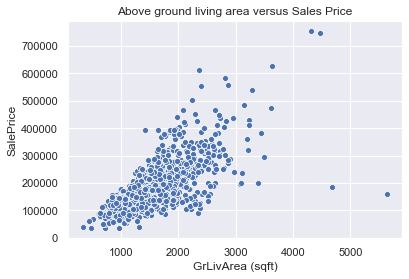

In [131]:
sns.scatterplot('GrLivArea', 'SalePrice', data=df)
plt.xlabel('GrLivArea (sqft)')
plt.title("Above ground living area versus Sales Price")

* 'TotalBath'
<p>Describes total bathrooms within a property</p>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

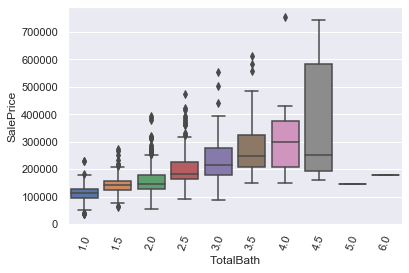

In [133]:
sns.boxplot(y='SalePrice', x='TotalBath',  data=df)
plt.xticks(rotation=70)

* 'GarageArea'
<p>Only given that the number of cars 'GarageCars' will depend on 'GarageArea'. It is also worth noting that this variable is close to falling under the same umbrella as 'GrLivArea', given that a larger garage attributes to a larger overall above ground living area.</p>

Text(0.5, 1.0, 'Garage area versus Sales Price')

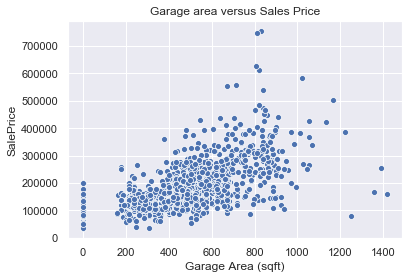

In [136]:
sns.scatterplot('GarageArea', 'SalePrice', data=df)
plt.xlabel('Garage Area (sqft)')
plt.title("Garage area versus Sales Price")

* 'Age'
* 'Neighborhood'
<p>Although there might be a negative correlation (~.50) existing between Age and sale price for a given property, it's not a strong one given the distribution of the data. Variation of property age also seems to be low throughout each neighborhood. </p>
    